# Algoritmo de Regresión Lineal 

Busca relacionar las características (data que vamos a importar y que formaría el eje X) con el output o variable objetivo, al tiempo que crea un modelo de regresión lineal, una linea que me va a permitir predecir valores en el futuro en base a esa línea. 

Dicha línea va a cruzar la mayor cantidad de datos de entrada para poder obtener los outputs o salidas.

In [17]:
from sklearn import datasets

In [18]:
x, y = datasets.make_regression(
    n_samples=100,
    n_features=1,
    noise=5,
    random_state=42
) 

In [19]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Variable Objetivo / Target')

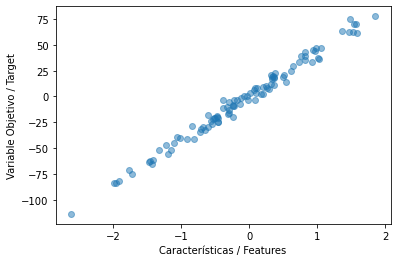

In [20]:
_, ax = plt.subplots()
ax.scatter(x,y, alpha=0.5)
ax.set_xlabel("Características / Features")
ax.set_ylabel("Variable Objetivo / Target")

In [21]:
# Ejemplo real 

# Características = Años de experiencia
# Variable objetivo = Salario anual de ingeniero en Inteligencia Artificial
# 

import numpy as np   

In [22]:
X = np.interp(x, (x.min(), x.max()), (0 , 5))

In [23]:
y = np.interp(y, (y.min(), y.max()), (78000, 150000))

Text(0, 0.5, 'Salario Anual en dólares')

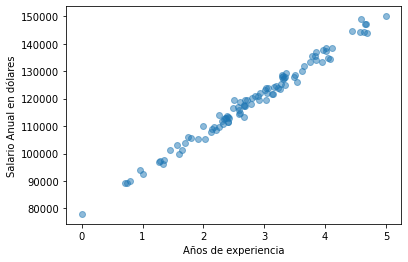

In [24]:
_, ax = plt.subplots()
ax.scatter(X,y, alpha=0.5)
ax.set_xlabel("Años de experiencia")
ax.set_ylabel("Salario Anual en dólares")


In [25]:
# Vamos a entrenar el modelo de regresión lineal 
# Necesitamos separar en datos para test y entrenamiento 

from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [27]:
X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape
# Como se puede observar, para entrenar un modelo de Machine Learning no son necesarios tantos datos,
# 100 datos pueden ser sufucientes para aplicaciones simples

((100, 1), (100,), (80, 1), (20, 1), (80,), (20,))

In [28]:
# Importamos un modelo ya creado. Con los input va a crear un línea recta que atravezará la mayor cantidad de puntos y esa 
# linea recta se utilizará para hacer predecir los datos futuros
from sklearn import linear_model

In [29]:
# Por ahora se usará una instancia del modelo sin parámetros, a la modificación de los parámetros de entrada se le llama hyperparametrización,
# dependiendo de éstos cambios se podrán tener mejoras en el entrenamiento, el no usar parámetros signific que se utilizarán los valores por
# default de los parámetros que podría recibir.
 
model = linear_model.LinearRegression()

In [30]:
# La salida es el resultado de la regresión entrenada 
model.fit(X_train, y_train)

LinearRegression()

In [31]:
# Siempre hay que visualizar los datos para poder comprenderlos

# Obtendremos una predicción, que al tratarse de los datos X_train que utilizamos para entrenar el modelo,
# la predicción debería ser los datos y_train o muy parecidos 

y_train_pred = model.predict(X_train) 

Text(0, 0.5, 'Salario Anual en dólares')

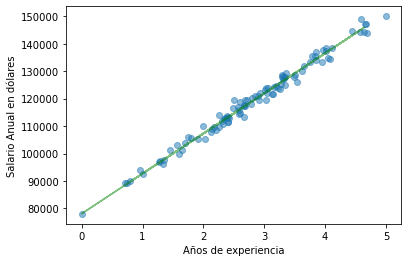

In [33]:
_, ax = plt.subplots()
# Se agrega la línea de la regresión (los datos de la predicción y el input que los creó)
ax.plot(X_train,y_train_pred, color="green", alpha=0.5)
ax.scatter(X,y, alpha=0.5)
ax.set_xlabel("Años de experiencia")
ax.set_ylabel("Salario Anual en dólares")

# El algoritmo con base a los datos de entrenamiento ha creado una función lineal que cruza la mayor cantidad de puntos input,
# dado que conocemos el input y la salida pero no la función que mapea su comportamiento. Se trata de la fórmula matemática que 
# se obtiene después de hacer el fitting o entrenamiento, al hacer la predicción se está usando la función matemárica obtenida. 

## Evaluación del algoritmo

Hay distintas métricas, para el aprendizaje supervisado, como en la regresión lineal, se usa el error absoluto y el error cuadrático medio.

Para esto ya no se usarán los datos de entrenamiento, sino los de test.


In [36]:
y_test_pred = model.predict(X_test)

Text(0, 0.5, 'Salario Anual en dólares')

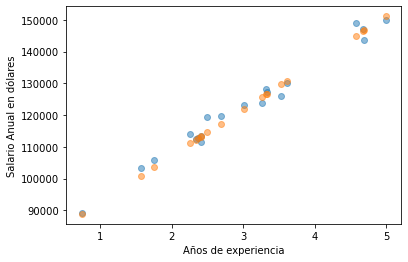

In [37]:
_, ax = plt.subplots()
# Visualizamos los datos de prueba
ax.scatter(X_test,y_test, alpha=0.5)
ax.scatter(X_test,y_test_pred, alpha=0.5)
ax.set_xlabel("Años de experiencia")
ax.set_ylabel("Salario Anual en dólares")

# Recordar que los datos de prueba siempre son datos reales, que sabemos y están comprobados.

In [38]:
# Calculo del error cuadrático medio como medida de que tan bien se realizó la predicción 

from sklearn.metrics import mean_squared_error


In [40]:
mse = mean_squared_error(y_true=y_test, y_pred=y_test_pred)
mse

5056661.36305063

In [41]:
# Sacamos raiz cuadrada para tener el valor real 

rmse = np.sqrt(mse)
rmse 

2248.702150808468